In [1]:
import numpy as np
import pandas as pd
import neurokit2 as nk
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from datasim.ecg.ecg_simulate import *
from datasim.scg.scg_simulate import *
import pywt
from utils import *

In [8]:
# def send_vital_result(group, mac,timestamp, hr, rr, bph, bpl, movement, occupancy, occ_timestamp, alert, alert_timestamp):
#     topic="/" + group + "/" + mac + "/vital"
 
#     payload ="timestamp=" + str(timestamp)

#     if hr != -1:
#         payload += "; heartrate=" + str(hr) 
#     if rr != -1:
#         payload += "; respiratoryrate=" + str(rr) 
#     if bph != -1:
#         payload += "; systolic=" + str(bph) 
#     if bpl != -1:
#         payload += "; diastolic=" + str(bpl) 
    
#     if movement != -1:
#         payload += "; movement=" + str(movement)
    
#     for index, oc in enumerate(occupancy):
#         payload += "; timestamp=" + str(occ_timestamp + index*10**9) # assuming timestamp in nano seconds
#         payload += "; occupancy=" + str(occupancy[index])
    
#     if alert != -1:
#         payload += "; timestamp=" + str(alert_timestamp) + "; alert=" + str(alert)

#     if not DRY_RUN_MODE:
#         mqtt_dedicated_pubish.publish(topic, payload, qos=1)
#         if debug:
#             global mqtt_publishing_cnt
#             mqtt_publishing_cnt +=1
#             if mqtt_publishing_cnt % 100 ==0:
#                 print(f"mqtt_publishing_cnt={mqtt_publishing_cnt}")
#     else:
#         # print(topic)
#         pass
#     return

In [2]:
## For Original Signal

influx = {'ip':'http://sensorserver.engr.uga.edu', 'db':'shake',
                  'user':'algtest', 'passw':'sensorweb711', 
                  'ssl':False}

table_name = 'Z'
data_name = 'value'
unit = '12:02:12:02:12:02'

In [2]:
## For Labels
# influx = {'ip':'http://sensorserver.engr.uga.edu', 'db':'healthresult',
#                   'user':'algtest', 'passw':'sensorweb711', 
#                   'ssl':False}

# table_name = 'vitals'
# data_name = 'hrlabel'
# unit = '74:4d:bd:8d:61:88'

In [11]:
data = np.load("db12.npy")

In [12]:
data.shape

(18, 49203)

In [ ]:
# vitals = data[:,-2].reshape(-1,1)
# vitals = np.repeat(vitals, repeats=120, axis=1)
# vitals

In [13]:
raw_data = data[:, :-3]

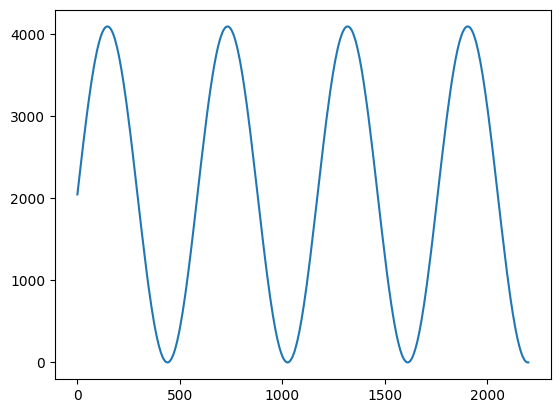

In [14]:
plt.plot(raw_data[0,:2200])

In [7]:
## For Raw Data

for i in range(data.shape[0]):
    write_influx(influx= influx, unit=unit,table_name=table_name, data_name=data_name, data=raw_data[i,:], start_timestamp=data[i, -3], fs = 410)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time   

Done


ft  Speed
100  6201    0     0  100  6201      0  1690k --:--:-- --:--:-- --:--:-- 2018k
110000    66126041        00          00    110000    66126041            00      992310kk  ----::----::----  ----::----::----  ----::----::----  11000039kk

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6040    0     0  100  6040      0  1213k --:--:-- --:--:-- --:--:-- 1474k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6191    0     0  100  6191      0  1205k --:--:-- --:--:-- --:--:-- 1511k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6155    0     0  100  6155      0   882k --:--:-- --:--:-- --:--:-- 1001k
  % Total    % Received % Xferd  Average S

Done


100  6169    0     0  100  6169      0  1187k --:--:-- --:--:-- --:--:-- 1506k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
0 01  0  006  0  56 22 0  10      0       0  0      0      0 1  0 001  0  0 6  0  56 220 0  1 -   -  :  -0 -  : 01- 2- 4 16-k5-6 :8--k-- ::------: -:----:-:- ---- -:-:----:- -: -- :- - - - 0--:--:--:--:-- - 12407178kk

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6201    0     0  100  6201      0  1133k --:--:-- --:--:-- --:--:-- 1211k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time 

Done


   0     -D -l :o -a -d :  -  -U  p -l -o :a -d -  :   - T- o Dt-la-ol:a -d - :  -US-pp leo na td      0   TLoetfatl    S pSepeedn
f t  0  S pe e d 
      00         00         00          0  0      0      0   -0- : - - : --  0- - : - - : -0-  ----::----::----   - - : -0-:-- --:--:--      0 % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                           %   T o t a l    D l oa%d  R eUcpeliovaedd   %  TXoftearld     ASvpeernatg e   S pLeeefdt     STpiemeed 
     0T i m e     C0u r r e n0t  
 %     T  ot0 a  l          0   %     R  e  c0 e  i  v  e  d     %0    X  f  e  r  d     0 A v -e- r: a-gD-el: -oS-ap de- ed - U: p- -lT:oi-am-de   -  -  :T o-Tt-ia:ml-e -       S  p  eT ni0tm e     CLuerfrte nt 
S p e e d 
     0            0         0           0  D l o a0d     U p l0o a d      T o0 t a l      0S p-e-n:t- - : - -L e-f-t: - -S:p-e-e d-
 T1o0t0a l  6 1 9 8%   R e c0e i v e d  0%   X1f0e0r d  6 1A9v8e r a g e   S0p e ed  3 3T0i3m9e  - - : -T-i:

Done


  L e4f5t2 4 3S p-e-e:d-
: - -0: --   - - :0- - : - -0  45 5 7 1 0
100  6201    0     0  100  620 1      0  453 6%6  T-o-t:a-l- : - -  %- -R:e-c-e:i-v-e d- -%: -X-f:e-r-d  4 5A5v9e5ra
ge Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
ee1d0 0    T6i0m8e3        T0i m e      0    T1i0m0e    6C0u8r3r e n t -     0  % Total    % Received % Xferd  Average Sp
    0     4 6 4 4 2   - - : - - : -                Dload  Upload   -T o-t-a:l- - : -S-p e-n-t: - - : -L-e f4t6 7 9S2pe
ed
 -- 1: 0- 0-T :i m6e2  0C-1u- r r- e- n: t-0f e1r0d0    A6v1e8r5a g e   S p ee0d    4 5T3i0m6e  - - : -T-i:m-e-  
-  :  -  -     40 5   4 17 07 0  
  6 2 0 1             0     4 36 7 2   - - : -D-l:-o-a d - -U:pl-o-a:d- -   -T-o:t-a-l: - -  S4p3e9n7t8 
   Left  Speed
-1-0:0- -  6-2-0:1- - : - -0          0 0 100  6201      0  48301 --:--:-- --:--:-- --:--:-- 48445
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
     

Done


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6178    0     0  100  6178      0  1150k --:--:-- --:--:-- --:--:-- 1206k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
5k1 0-0- : -6-2:0-1-  - - : -0- : - -   -0- : --1:0-0-   16129011k --:--     0
     0  1285k --:--:-- --:--:-- --:--:-- 1513k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Tot

Done


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6118    0     0  100  6118      0  1154k --:--:-- --:--:-- --:--:-- 1194k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time  

Done


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6122    0     0   1 0% 0T o t6a1l2 2      %   R e0c ei v1e5d4 9%k  Xf-e-r:d- - :A-v-e r-ag-e: -S-p:e-e-d  - - :T-i-m:e- -   1 9T9i2mke 
    Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
10100 0 6 1 806 2 0 0     0    01 69 4 k   --0: -- :1-0-0  - -6:-2-0:0- -   - - : --0: --   2907141kk 
--:--:-- --:--:-- --:--:-- 1009k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--   

Done


 -1-0:0- - :6-1-9 8- - : - -0: - -   1 109 3 k10
0  6198      0   952k --:--:-- --:--:-- --:--:-- 1008k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6110    0     0  100  6110      0  1312k --:--:-- --:--:-- --:--:-- 1491k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
  1S0p0e e d6                    Dload  Upload   Total   Spent    Left
    00          00    1 0 00    6 2 

Done


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6139    0     0  100  6139      0  1159k --:--:-- --:--:-- --:--:-- 1199k
100  6145    0     0  100  6145      0  1180k --:--:-- --:--:-- --:--:-- 1200k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6172    0     0  100  6172      0   782k --:--:--

Done
Done
Done
Done


    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6128    0     0  100  6128      0  1275k --:--:-- --:--:-- --:--:-- 1496k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time   

Done


                    Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
pe1n0t0     6 1L2e2f t     S0p e e d d  Upload   Total   S
    601 22        0    0    0  2 9 9 7  0  0 : 0 00: 0 2     00: 0 0 : 0 2  0- - : -  - :0- -- - :2-9-9:8--
  1 000  6141    0     0  100  6141      0   3001  0:00:02  0:00:02 --:--:--  3002
0 1 0 0  0  6 2 0 1  0      0      0    0     1 000  - -6:2-0-1: - -     0 :00 0 : 0320 3-7- : -0-::0-0-: 0 2     00:00:02 --:--: --  3038
 T1i0 m0e      Time   %C uTrorteanlt ge Speed   Time   
       %   R e c e i v e d    %   6X 1f 8e 3r  d        A 0v  e  r  a  g  e 0     D1l0o0a d  6 S1Up8pe3le oda d     T  i Tm oe t 0a   l    T 3i 0mS1ep1 e  n  t0  :  0T 0i :mL0ee2f  t   0 C:Sup0re0re:ed0n
2t 
 -  :  - 0-       3 0 101   
 0     0    0     0             0             0   - - : - - : --   -D-l:o-a-d: - -U p-l-o:a-d- 

Done


ived % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
    00          % 0  0T  o  t  a  l0    0       %    0R  e c 0e  i -v0-e :d -  -% :  X-0f- e  r- d-  :   -A -v0:e -r -a  g e-  - S 0:p% -e --eT-:do:- t- a  l T  i  m  -e -0 %:  - R- e Tc ie0mi:ev0 e0 d:  0 %2   TX-if-me:er- d-  :C -uA-rv re re ang te
   0S p e e d       T i m e         T i m e           T i m e     C uDrlroeandt 
       T 0o  t  a  l        0S  p  e n  t   0          L  e  f0 t        S  p0De leo da 
 o  a  d0   0     T  o  t  a0 l 0     -  -S0:p -e -n :t -  - 0      0L :e 0f00t :  0  2S  p -e0-e :d 
e%     R0 e  c Te ii m ve0 e  d     %   0TX if me er  d   0C  uA rv re er0na tg  0%0  T o t a l  0   - -%:- -R:e-c-e i-v-e:d- -%: -X-f e-r-d : - -A:v-e-r a g  e   0S%p eTeodt a l  T i m 
 e      S0 p  e  e  d         0 T  i  m  e        0     - T- i: m- e- :  -  -       0 :T 0 i0 m: 0D2l o-a-d: - -U:p-le-o  a  dC  u  r  r0Teontta
L  e  

Done


  1 0T0i m e6 1 8 9    T i m0e     C u r0re n t1o t0a l- - : - -%: -R-e c e0i:v0e0d: 0%2  X-f-e:r-d- : -A-v e r a g e0 Speed   Time 
0 0     6 1 8 9             0       2 1 2 2     0 : 0 0 : 0 2     0D:l00o:a0d2   -U-p:l-o-a:d- -    T2o1t2a2l
   Spent    L eft  Speed
T o t0a l        0%   R e c0e i v e d  0%   X f e0r d     A v0e r a g e   S0p e e d      0T i-m-e: - - : -T-i m-e- : - - : -T-i m-e- : -C-u:r-r-e n t 
t1a0l0     6S1p2e7n t      0  L e f t  0  S p1e0e0d To
50   1   0 00 : 0 0  0 6 :01 0 7 2 8    0    00  :   0 0 0  0:   0   20      - 0 -  0:   - 1 -  0: 00-   -    0  6  21  17  08 05     
- 0-  : -- --0:: -- -- : 2- 1-02 :5-0 -0 ::0-0-:2:0 -0--:- 0:-2-- -: :-0--:-:0 -0 -:  0  2    0- -0:--:--  2125
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6192    0     0  100  6192      0   21

Done


rrent
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0  %  Total    %  R%e cTeoitvaeld   %   X%f eRredc e iAvveder a%g eX fSeprede d  A v eTriamgee   S p eTeidm e    T i m eT i m e  T iCmuer r e n t 
T i m e     C u r r e n t 
                                        D l o a d     U p l o a d  D l oTaodt a Ulp l o aSdp e n tT o t a lL e f tS p eSnpte e d 
  S p0e ed 
0    0    0      0    0    0       0    0        00  - - : - -0: - -     0 :00 0 : 0 3   -0- :----::----: - -     00:00:03 --:--:--     0  % Total    % Received % Xferd  Averag e Speed   T i%m eT o t a lT i m e  %   R e cTeiimvee d  C%u rXrfeenrtd
and1t 0 e r a g e   S p e e d       T i m e         T i m e        D lToiamde    CUuprlroe
 0    T  o6 1t 5a 4l           S 0p  e  n  t      0       L1 e 0f 0t       S 6p 1e 5e 4d  
 d      01U 9p0l 1o  a  d 0 0:   0 T0 o: t00a3 l      0  : S00p0 e: n0 t3   0 -  -  : L- e- f

Done


100  6132    0     0  100  6132      0   1641  0:00:03  0:00:03 --:--:--  1641
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6171    0     0  100  6171      0   885k --:--:-- --:--:-- --:--:-- 1004k
100  6131    0     0  100  6131      0   1632  0:00:03  0:00:03 --:--:--  1633
100  6187    0     0  100  6187      0   1656  0:00:03  0:00:03 --:--:--  1656
3 1 000: 0 06:10435  - - : -0- : - -   0  1 614050 :0
 6145      0   1644  0:00:03  0:00:03 --:--:--  1645
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
  1 0 0     6 1D3l1o a d    0U p l o a d0     T1o0t0a l  6 1 3S1p e n t      0  L e f1t6 4 3S p e0e:d0
  03    0 :  000 : 0 3  0- - : - - :0- -     106 4 3 
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                        

  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent     Left  Speed 
l    0    %   R e0c e i v e0d   %   X f0e r d    A0v e r a g e0  S p e e d  0    T i m e  0   - -T:i--me: - -   - -T:i-m-e: - -C u-r-r:e-n-t:
- -           0                          Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  - 1:  0 - 00-   :T - i6- m1 14e 67  5  6    C 0 u 0r:0r0 e0 :n 0t 31e-0 -0 :  -  6-T1:i3-m2-e    -
    0   0  : 10 00 :0 0  3    - 6- 1: 4- 7-  : -  -        1  6 50 6    
n  t8  50 7  k   Lo-a-d: - -U p-l-o:a-d- : - -T o-t-a:l- - : -S-pe 
 e f0t     S p0e e d 
- 1 0 0     06167     0  %   T o t

In [2]:
# ## For Vitals
# for i in range(vitals.shape[0]):
#     write_influx(influx= influx, unit=unit,table_name=table_name, data_name=data_name, data=vitals[i,:], start_timestamp=data[i, -3], fs = 1)

## Code Testing

In [64]:
def mexhat_gen(amp, samples, duration, hr):
    points = samples
    reps = int(duration*hr/60)
    a = 4 ##width
    vec2 = signal.ricker(points, a)
    vec2 = ((vec2-np.min(vec2))/(np.max(vec2)-np.min(vec2)) * amp)
    vec2 = np.tile(vec2,reps)
    return vec2

/tmp/ipykernel_2395953/10410335.py:5: DeprecationWarning: scipy.signal.ricker is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  vec2 = signal.ricker(points, a)


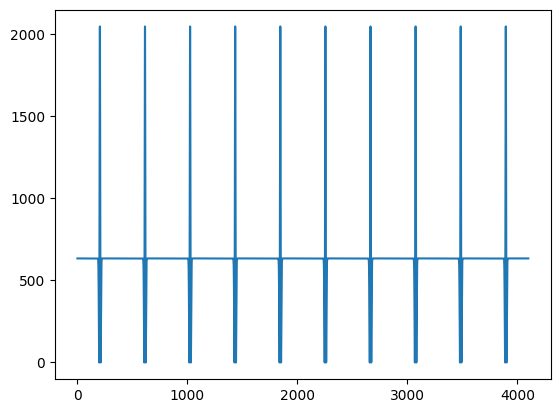

In [65]:
a = mexhat_gen(amp=2048, samples=410, duration=10, hr=60)
plt.plot(a[:])

In [42]:
pywt.wavelist('mexh')

['mexh']